In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

In [2]:
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
q3 = " select min(population) ,max(population) ,min(population_growth) ,max(population_growth) from facts;"
pd.read_sql_query(q3,conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [5]:
q4 = "select * from facts where population == (select min(population) from facts)"
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [6]:
q5 = "select * from facts where population == (select max(population) from facts)"
pd.read_sql_query(q5,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


Country with no population is Antarctica. Also to be noted here world is incorrectly stored as a country and it shows the total world population(all countries combined) 

In [7]:
## Country with the highest population density
q6 = "select *, population/area as population_density from facts order by population/area desc"
pd.read_sql_query(q6,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,population_density
0,205,mc,Macau,28.0,28.0,0.0,5.927310e+05,0.80,8.88,4.22,3.37,21168.0
1,117,mn,Monaco,2.0,2.0,0.0,3.053500e+04,0.12,6.65,9.24,3.83,15267.0
2,156,sn,Singapore,697.0,687.0,10.0,5.674472e+06,1.89,8.27,3.43,14.05,8141.0
3,204,hk,Hong Kong,1108.0,1073.0,35.0,7.141106e+06,0.38,9.23,7.07,1.68,6445.0
4,251,gz,Gaza Strip,360.0,360.0,0.0,1.869055e+06,2.81,31.11,3.04,0.00,5191.0
5,233,gi,Gibraltar,6.0,6.0,0.0,2.925800e+04,0.24,14.08,8.37,3.28,4876.0
6,13,ba,Bahrain,760.0,760.0,0.0,1.346613e+06,2.41,13.66,2.69,13.09,1771.0
7,108,mv,Maldives,298.0,298.0,0.0,3.932530e+05,0.08,15.75,3.89,12.68,1319.0
8,110,mt,Malta,316.0,316.0,0.0,4.139650e+05,0.31,10.18,9.09,1.98,1310.0
9,227,bd,Bermuda,54.0,54.0,0.0,7.019600e+04,0.50,11.33,8.23,1.88,1299.0


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2711100da0>,
      dtype=object)

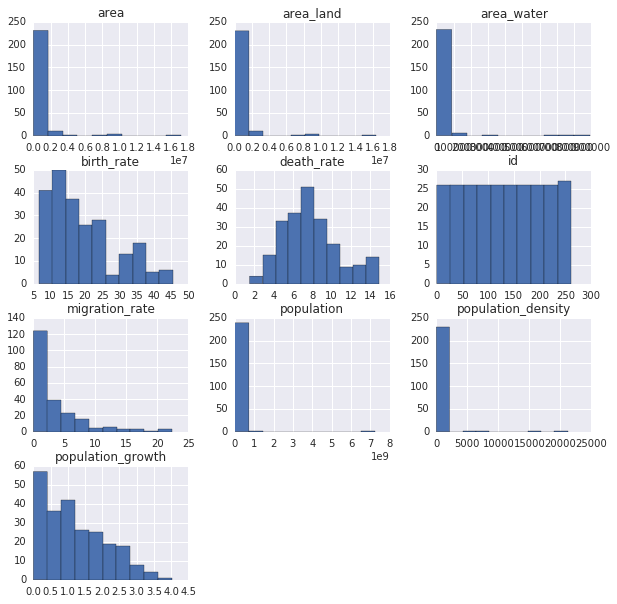

In [8]:
#histogram of the population densitites

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q7 = '''select *, population/area as population_density 
from facts 
order by population/area desc'''
pd.read_sql_query(q7, conn).hist(ax=ax)